<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyGameOfLife</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>Game</b>Of<b style=color:red;>Life</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyGameOfLife.png"></td>
</tr>
</table>

----
# `pyGameOfLife`

Conway's Game of Life, the famous cellular automaton of [John Horton Conway](https://de.wikipedia.org/wiki/John_Horton_Conway) (1932-2020).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import libGameOfLife

----
In this notebook, we create the two sequences from the previous notebook **introduction** with a fixex 3x3 grid setup
for illustration.

----
## Initial grid
We define **nine blocks** of a 3x3 grid in a larger 3D array `grid`.

- The central cell is always a living cell, marked green.
- Living cells in the outer cells increase from left to right, from **zero** to **eight** living cells.
- Dead cells are marked as `0`.
- Living cells are marked as `1`.

In [2]:
grid =  np.array([[[0,0,0],[0,1,0],[0,0,0]],
                  [[1,0,0],[0,1,0],[0,0,0]],
                  [[1,1,0],[0,1,0],[0,0,0]],
                  [[1,1,1],[0,1,0],[0,0,0]],
                  [[1,1,1],[1,1,0],[0,0,0]],
                  [[1,1,1],[1,1,1],[0,0,0]],
                  [[1,1,1],[1,1,1],[1,0,0]],
                  [[1,1,1],[1,1,1],[1,1,0]],
                  [[1,1,1],[1,1,1],[1,1,1]]])
print(grid.shape)

(9, 3, 3)


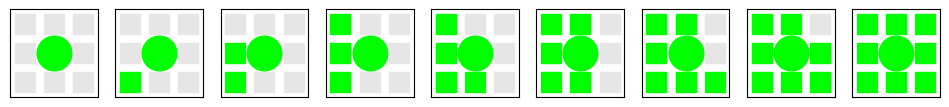

In [3]:
fig,axs = plt.subplots(1,9,figsize=(12,4))
for k in range(9):
    axs[k].set_aspect('equal', 'box')
    axs[k].set_xlim([-0.5,2.5]);axs[k].set_ylim([-0.5,2.5])
    axs[k].set_xticks([]);axs[k].set_yticks([])
    for i in range(grid.shape[1]):
        for j in range(grid.shape[2]):
            if (i==1 and j==1):
                markersymbol = 'o'; markersize = 25
            else:
                markersymbol = 's'; markersize = 15
            if (grid[k][i][j]==0):
                axs[k].plot(i,j,color=(0.9,0.9,0.9),lw=0,marker=markersymbol,markersize=markersize)
            else:
                axs[k].plot(i,j,color=(0.0,1.0,0.0),lw=0,marker=markersymbol,markersize=markersize)

Next, we write an **update function**, implementing the rules for Conway's game of live:
- We sum up all border cell values to `total`.
- We then check, if a cell is living, if yes:
    - We check for the number of neighboring cells, 
    - assign the new state `living`, if `total=2` or `total=3`
    - assign the new state `dead`, else.

In [4]:
def gridUpdateNoroll(grid):
    """
    Conway's Game of Life
    update function (not cyclic across boundaries)
    input:
     grid      - 2D grid field
    output:
     grid      - 2D grid field (updated)
    use:
     grid = libGameOfLife.gridUpdate(grid)
    """
    total  = 0
    nx = grid.shape[0]
    ny = grid.shape[1]
    newgrid = grid.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            total = 0
            total += grid[i+1,j+1]
            total += grid[i+1,j]
            total += grid[i+1,j-1]         
            total += grid[i,j+1]
            total += grid[i,j-1]       
            total += grid[i-1,j+1]
            total += grid[i-1,j]
            total += grid[i-1,j-1]
    # fate of living cell
    if grid[1,1]  == 1: 
        if (total < 2) or (total > 3): 
            newgrid[1,1] = 0 
    # fate of dead cell
    else: 
        if total == 3: 
            newgrid[1,1] = 1
    return newgrid

In [5]:
k=1
newgrid = gridUpdateNoroll(grid[k])
print(grid[k],'\n',newgrid)

[[1 0 0]
 [0 1 0]
 [0 0 0]] 
 [[1 0 0]
 [0 0 0]
 [0 0 0]]


----
## Fate of living cell
We apply the update function `gridUpdateNoroll` to all nine **living** cells.

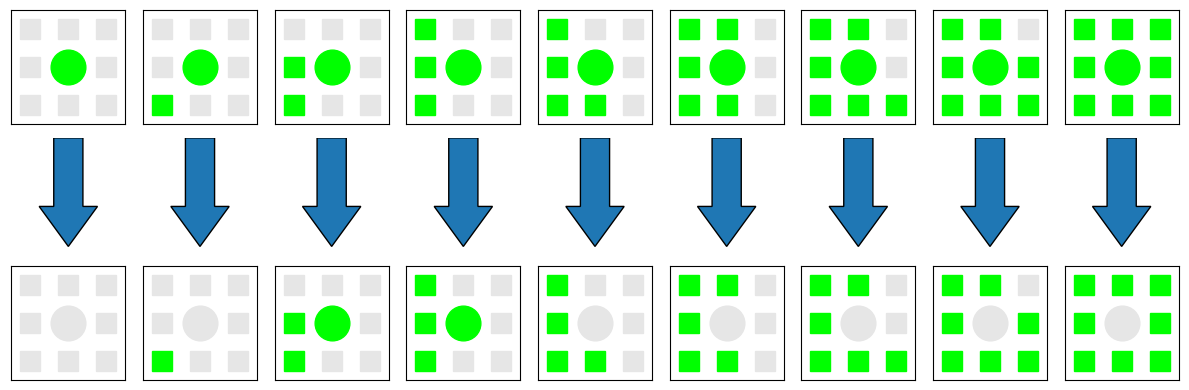

In [6]:
fig,axs = plt.subplots(3,9,figsize=(12,4))
for k in range(9):
    newgrid = gridUpdateNoroll(grid[k])
    axs[0,k].set_aspect('equal', 'box')
    axs[0,k].set_xlim([-0.5,2.5]);axs[0,k].set_ylim([-0.5,2.5])
    axs[0,k].set_xticks([]);axs[0,k].set_yticks([])
    for i in range(grid.shape[1]):
        for j in range(grid.shape[2]):
            if (i==1 and j==1):
                markersymbol = 'o'; markersize = 25
            else:
                markersymbol = 's'; markersize = 15
            if (grid[k][i][j]==0):
                axs[0,k].plot(i,j,color=(0.9,0.9,0.9),lw=0,marker=markersymbol,markersize=markersize)
            else:
                axs[0,k].plot(i,j,color=(0.0,1.0,0.0),lw=0,marker=markersymbol,markersize=markersize)
    
    axs[1,k].set_xlim([-1,1]);axs[1,k].set_ylim([-1,1])
    axs[1,k].axis('off')
    axs[1,k].arrow(0,1,0.0,-1.9,width=0.5,head_width=1.0,head_length=0.7,length_includes_head=True)
                
    axs[2,k].set_aspect('equal', 'box')
    axs[2,k].set_xlim([-0.5,2.5]);axs[2,k].set_ylim([-0.5,2.5])
    axs[2,k].set_xticks([]);axs[2,k].set_yticks([])
    for i in range(grid.shape[1]):
        for j in range(grid.shape[2]):
            if (i==1 and j==1):
                markersymbol = 'o'; markersize = 25
            else:
                markersymbol = 's'; markersize = 15
            if (newgrid[i][j]==0):
                axs[2,k].plot(i,j,color=(0.9,0.9,0.9),lw=0,marker=markersymbol,markersize=markersize)
            else:
                axs[2,k].plot(i,j,color=(0.0,1.0,0.0),lw=0,marker=markersymbol,markersize=markersize)
plt.tight_layout()
plt.savefig('images/livingCell.png')

----
## Fate of dead cells
We now define **nine blocks** of a 3x3 grid in a larger 3D array `grid`, with dead cells in the center.

We apply the update function `gridUpdateNoroll` to all nine living cells.

In [7]:
grid =  np.array([[[0,0,0],[0,0,0],[0,0,0]],
                  [[1,0,0],[0,0,0],[0,0,0]],
                  [[1,1,0],[0,0,0],[0,0,0]],
                  [[1,1,1],[0,0,0],[0,0,0]],
                  [[1,1,1],[1,0,0],[0,0,0]],
                  [[1,1,1],[1,0,1],[0,0,0]],
                  [[1,1,1],[1,0,1],[1,0,0]],
                  [[1,1,1],[1,0,1],[1,1,0]],
                  [[1,1,1],[1,0,1],[1,1,1]]])
print(grid.shape)

(9, 3, 3)


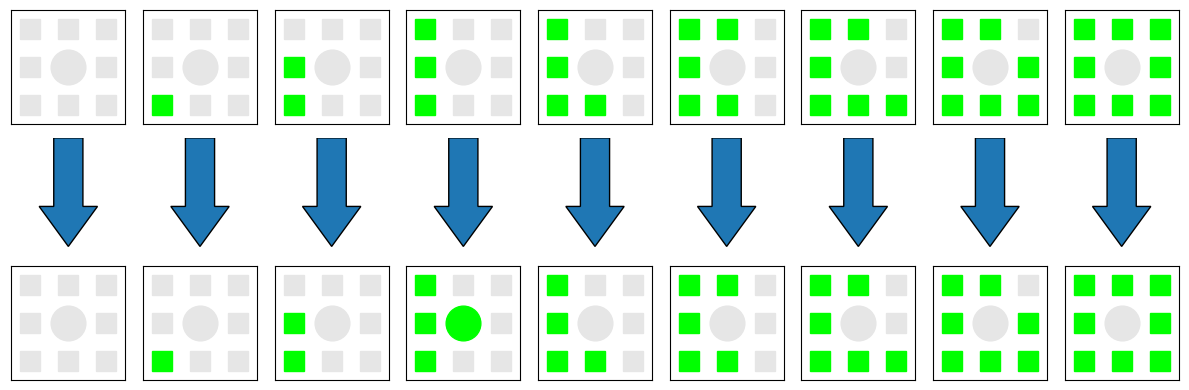

In [8]:
fig,axs = plt.subplots(3,9,figsize=(12,4))
for k in range(9):
    newgrid = gridUpdateNoroll(grid[k])
    axs[0,k].set_aspect('equal', 'box')
    axs[0,k].set_xlim([-0.5,2.5]);axs[0,k].set_ylim([-0.5,2.5])
    axs[0,k].set_xticks([]);axs[0,k].set_yticks([])
    for i in range(grid.shape[1]):
        for j in range(grid.shape[2]):
            if (i==1 and j==1):
                markersymbol = 'o'; markersize = 25
            else:
                markersymbol = 's'; markersize = 15
            if (grid[k][i][j]==0):
                axs[0,k].plot(i,j,color=(0.9,0.9,0.9),lw=0,marker=markersymbol,markersize=markersize)
            else:
                axs[0,k].plot(i,j,color=(0.0,1.0,0.0),lw=0,marker=markersymbol,markersize=markersize)
    
    axs[1,k].set_xlim([-1,1]);axs[1,k].set_ylim([-1,1])
    axs[1,k].axis('off')
    axs[1,k].arrow(0,1,0.0,-1.9,width=0.5,head_width=1.0,head_length=0.7,length_includes_head=True)
                
    axs[2,k].set_aspect('equal', 'box')
    axs[2,k].set_xlim([-0.5,2.5]);axs[2,k].set_ylim([-0.5,2.5])
    axs[2,k].set_xticks([]);axs[2,k].set_yticks([])
    for i in range(grid.shape[1]):
        for j in range(grid.shape[2]):
            if (i==1 and j==1):
                markersymbol = 'o'; markersize = 25
            else:
                markersymbol = 's'; markersize = 15
            if (newgrid[i][j]==0):
                axs[2,k].plot(i,j,color=(0.9,0.9,0.9),lw=0,marker=markersymbol,markersize=markersize)
            else:
                axs[2,k].plot(i,j,color=(0.0,1.0,0.0),lw=0,marker=markersymbol,markersize=markersize)
plt.tight_layout()
plt.savefig('images/deadCell.png')

----